In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# List files available
print(os.listdir("data"))

['application_test.csv', '.DS_Store', 'HomeCredit_columns_description.csv', 'application_train_split.csv', 'POS_CASH_balance.csv', 'application_test_split.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


In [27]:
app_train = pd.read_csv('data/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

# Séparer les données en ensembles de formation et de test
train_data, test_data = train_test_split(app_train, test_size=0.3)

# Afficher les formes des nouvelles bases de données
print('Train data shape: ', train_data.shape)
print('Test data shape: ', test_data.shape)

# Afficher les premières lignes de chaque base de données
print('Train data head:\n', train_data.head())
print('Test data head:\n', test_data.head())

# Exporter les ensembles train et test en fichiers CSV
train_data.to_csv('data/application_train_split.csv', index=False)
test_data.to_csv('data/application_test_split.csv', index=False)

print('Les fichiers ont été exportés avec succès.')

Training data shape:  (307511, 122)
Train data shape:  (215257, 122)
Test data shape:  (92254, 122)
Train data head:
         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
268363      410978       0         Cash loans           F            N   
281073      425646       0         Cash loans           F            Y   
172367      299740       0         Cash loans           F            N   
113514      231647       0         Cash loans           F            N   
94590       209832       0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
268363               N             0           90000.0    254700.0   
281073               Y             0          153000.0   1051294.5   
172367               N             0          164250.0    119925.0   
113514               N             0          135000.0    544491.0   
94590                Y             0          126000.0    808650.0   

        AMT_ANNU

In [28]:
# Testing data features
app_test = pd.read_csv('data/application_test_split.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (92254, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,342180,0,Cash loans,M,N,Y,4,180000.0,743031.0,39717.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,259636,0,Cash loans,F,N,Y,0,202500.0,472500.0,44991.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
2,305882,1,Cash loans,M,N,N,0,112500.0,405000.0,27396.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,243264,0,Cash loans,M,Y,Y,1,180000.0,840951.0,35761.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
4,264946,0,Cash loans,F,Y,Y,0,90000.0,573408.0,26698.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


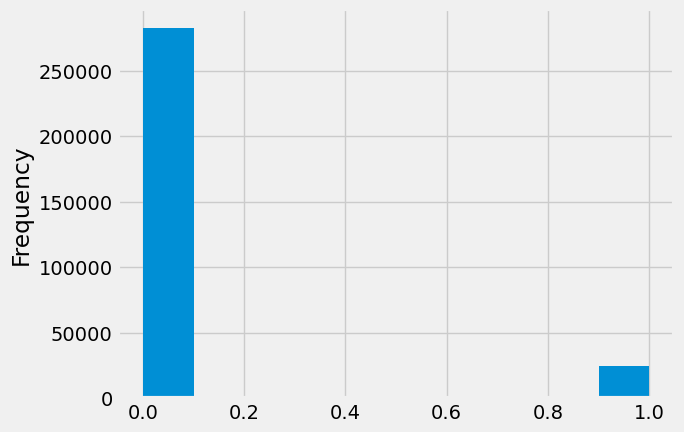

In [29]:
app_train['TARGET'].value_counts()
app_train['TARGET'].astype(int).plot.hist();

In [30]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [31]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [32]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [33]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [34]:
# Créer un objet encodeur de labels
le = LabelEncoder()
le_count = 0

# Itérer à travers les colonnes
for col in app_train:
    if app_train[col].dtype == 'object':
        # Si 2 catégories uniques ou moins
        if len(list(app_train[col].unique())) <= 2:
            # Entraîner sur les données d'entraînement
            le.fit(app_train[col])
            # Transformer les données d'entraînement et de test
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Suivre le nombre de colonnes encodées
            le_count += 1
            
print('%d colonnes ont été encodées avec des labels.' % le_count)

3 colonnes ont été encodées avec des labels.


In [35]:
# Encodage one-hot des variables catégorielles
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Dimensions des caractéristiques d\'entraînement : ', app_train.shape)
print('Dimensions des caractéristiques de test : ', app_test.shape)

Dimensions des caractéristiques d'entraînement :  (307511, 243)
Dimensions des caractéristiques de test :  (92254, 243)


In [36]:
# Extraire les étiquettes de la colonne TARGET
train_labels = app_train['TARGET']

# Aligner les données d'entraînement et de test, garder uniquement les colonnes présentes dans les deux dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Réintégrer la cible
app_train['TARGET'] = train_labels

print('Dimensions des caractéristiques d\'entraînement : ', app_train.shape)
print('Dimensions des caractéristiques de test : ', app_test.shape)


Dimensions des caractéristiques d'entraînement :  (307511, 243)
Dimensions des caractéristiques de test :  (92254, 243)


Il y a 16543 anomalies dans les données de test sur 92254 entrées


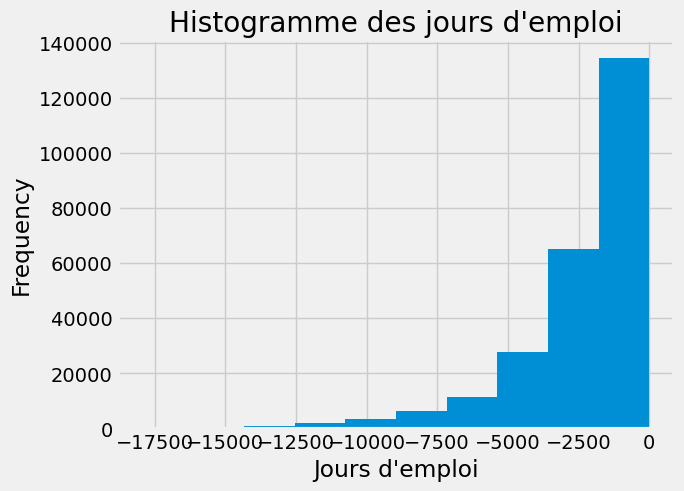

In [37]:
# Créer une colonne de drapeau pour les valeurs anormales
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Remplacer les valeurs anormales par NaN
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# Afficher un histogramme des jours d'emploi
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Histogramme des jours d\'emploi');
plt.xlabel('Jours d\'emploi');

# Créer une colonne de drapeau pour les valeurs anormales dans app_test
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243

# Remplacer les valeurs anormales par NaN dans app_test
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# Imprimer le nombre d'anomalies dans les données de test
print('Il y a %d anomalies dans les données de test sur %d entrées' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))


In [38]:
# Trouver les corrélations avec la cible et les trier
correlations = app_train.corr()['TARGET'].sort_values()

# Afficher les corrélations
print('Les corrélations les plus positives:\n', correlations.tail(15))
print('\nLes corrélations les plus négatives:\n', correlations.head(15))


Les corrélations les plus positives:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Le

In [39]:
# Trouver la corrélation entre les jours positifs depuis la naissance et la cible
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982703

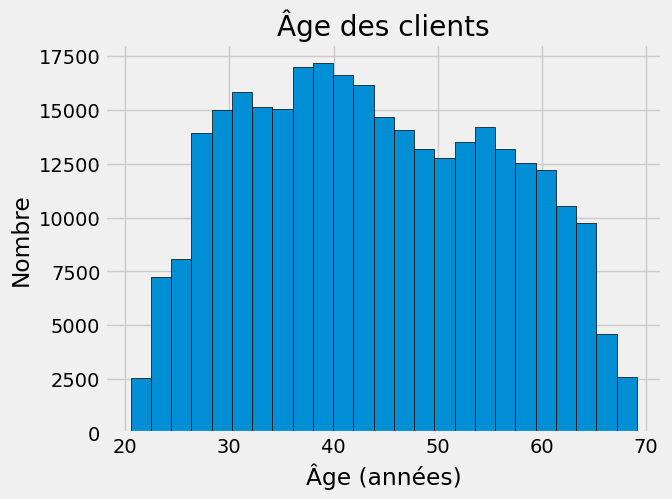

In [40]:
# Définir le style des graphiques
plt.style.use('fivethirtyeight')

# Tracer la distribution des âges en années
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Âge des clients'); plt.xlabel('Âge (années)'); plt.ylabel('Nombre');

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


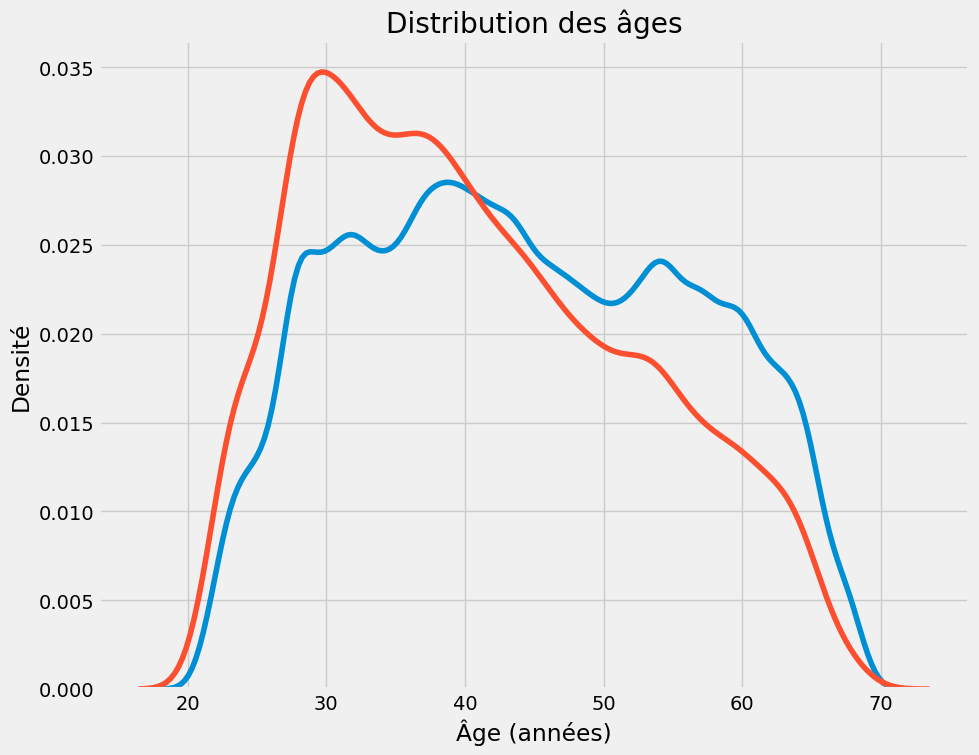

In [41]:
plt.figure(figsize = (10, 8))

# Graphique KDE des prêts remboursés à temps
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# Graphique KDE des prêts non remboursés à temps
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Étiquetage du graphique
plt.xlabel('Âge (années)'); plt.ylabel('Densité'); plt.title('Distribution des âges');


In [42]:
# Informations sur l'âge dans un DataFrame séparé
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Regrouper les données d'âge en tranches
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)


/var/folders/25/t6v1433n06x6vfl9wjbxn8sw0000gn/T/ipykernel_20482/1741901597.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
/var/folders/25/t6v1433n06x6vfl9wjbxn8sw0000gn/T/ipykernel_20482/1741901597.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


/var/folders/25/t6v1433n06x6vfl9wjbxn8sw0000gn/T/ipykernel_20482/3839786953.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups = age_data.groupby('YEARS_BINNED').mean()


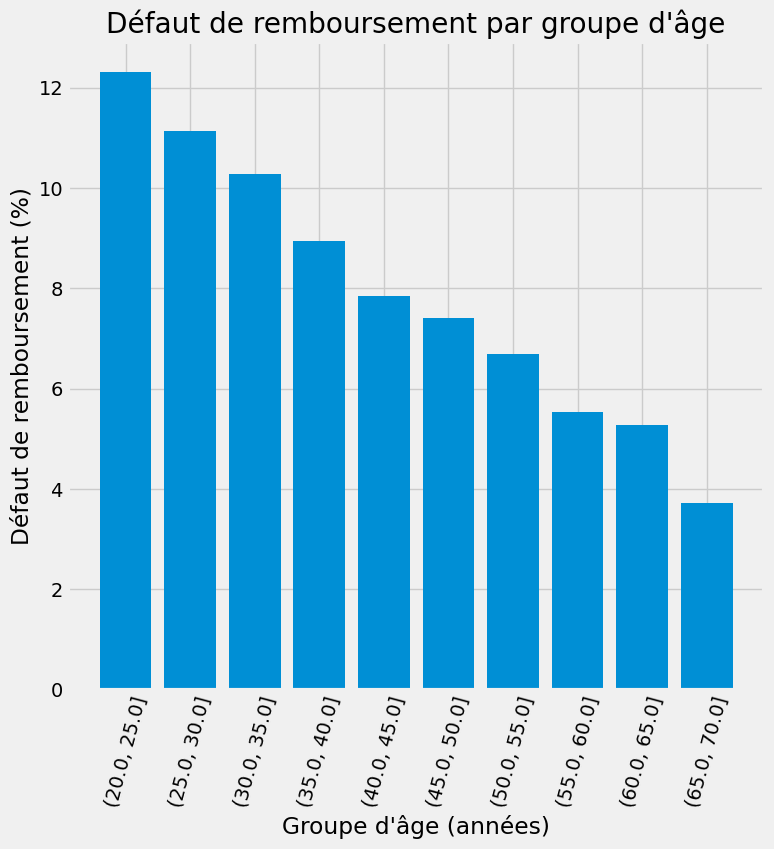

In [43]:
# Grouper par tranche d'âge et calculer les moyennes
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

plt.figure(figsize = (8, 8))

# Tracer les tranches d'âge et la moyenne de la cible comme un graphique en barres
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Étiquetage du graphique
plt.xticks(rotation = 75); plt.xlabel('Groupe d\'âge (années)'); plt.ylabel('Défaut de remboursement (%)')
plt.title('Défaut de remboursement par groupe d\'âge');


Text(0.5, 1.0, 'Carte thermique des corrélations')

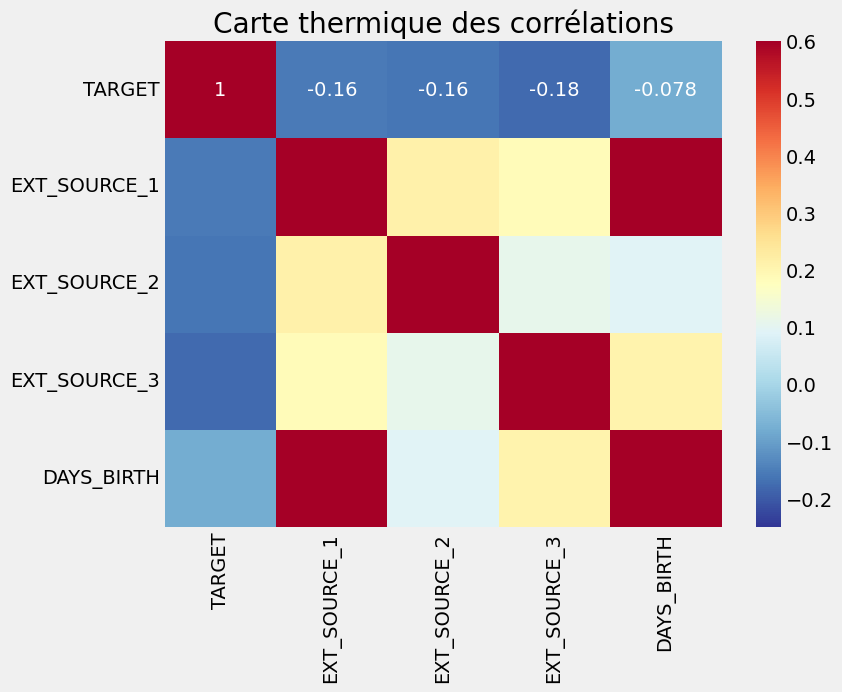

In [44]:
# Extraire les variables de source externe et montrer les corrélations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

plt.figure(figsize = (8, 6))

# Carte thermique des corrélations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Carte thermique des corrélations')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

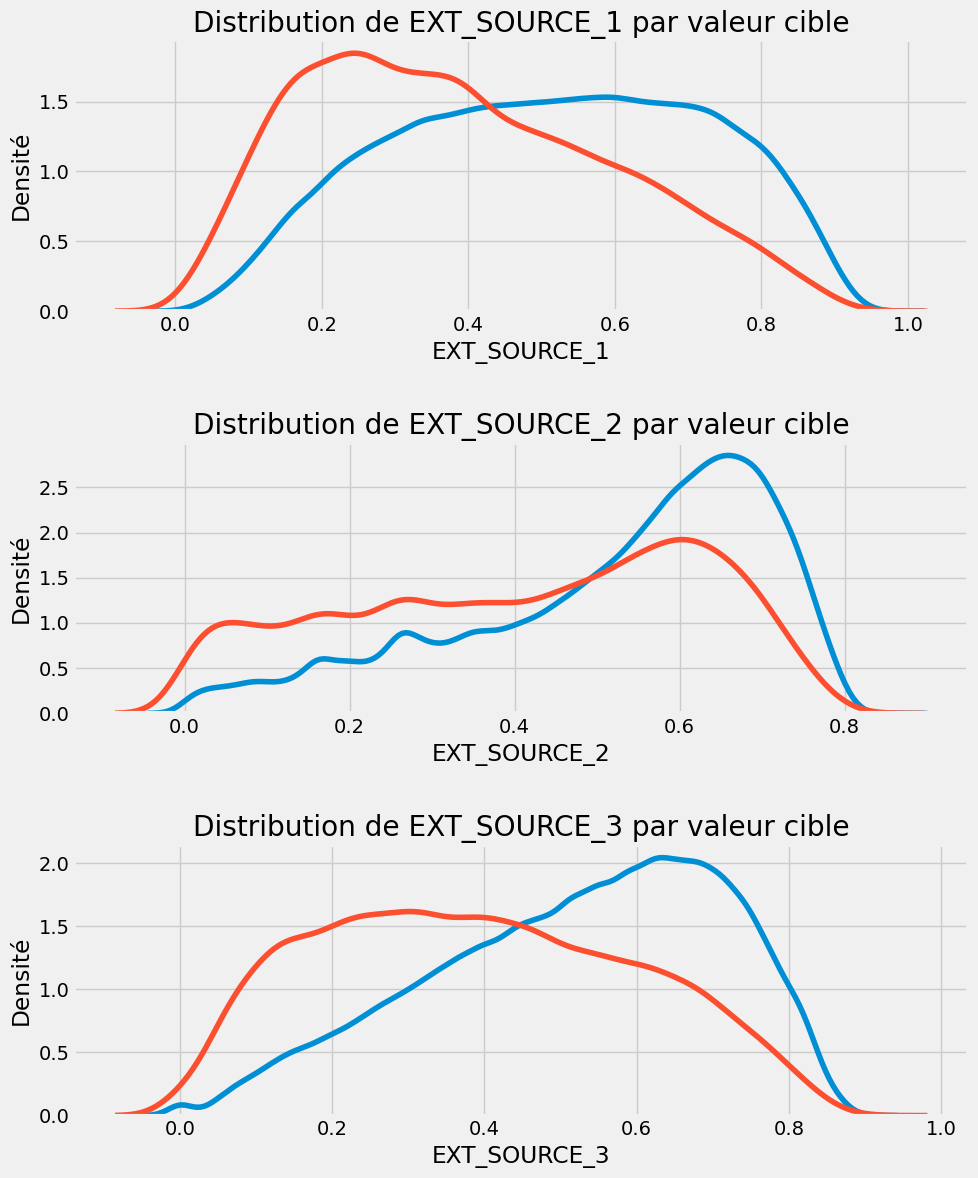

In [45]:
plt.figure(figsize = (10, 12))

# Itérer à travers les sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # Créer un nouveau sous-graphique pour chaque source
    plt.subplot(3, 1, i + 1)
    # Tracer les prêts remboursés
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # Tracer les prêts non remboursés
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Étiqueter les graphiques
    plt.title('Distribution de %s par valeur cible' % source)
    plt.xlabel('%s' % source); plt.ylabel('Densité');
    
plt.tight_layout(h_pad = 2.5)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

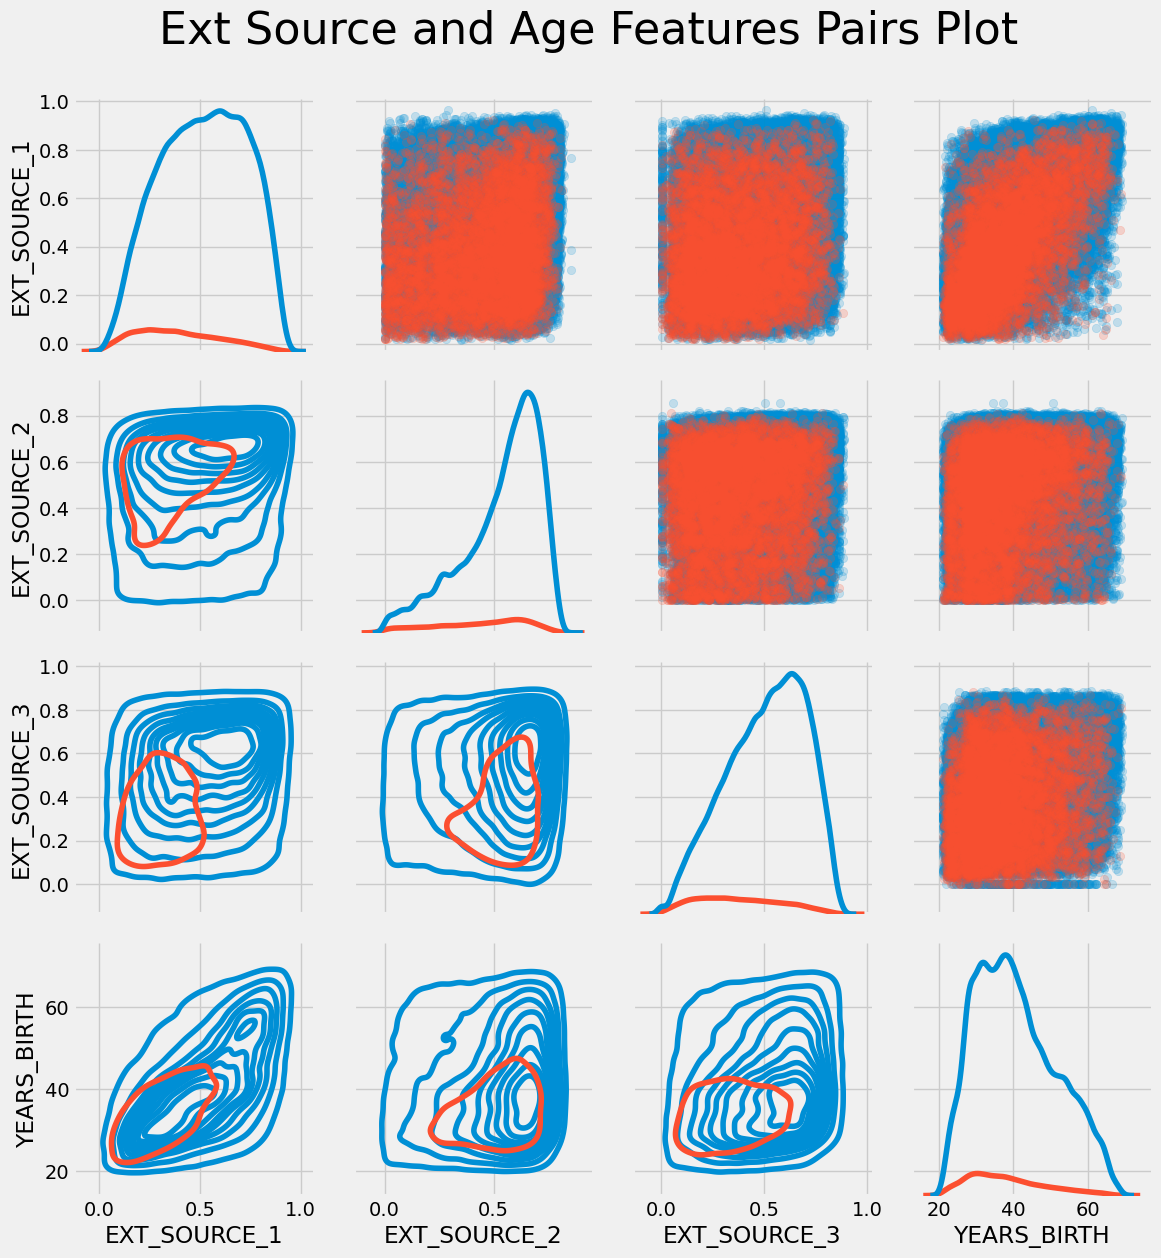

In [46]:
# Copier les données pour le tracé
plot_data = ext_data.drop(columns=['DAYS_BIRTH']).copy()

# Ajouter l'âge du client en années
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Supprimer les valeurs manquantes et limiter aux 100000 premières lignes
plot_data = plot_data.dropna().iloc[:100000, :]

# Fonction pour calculer le coefficient de corrélation entre deux colonnes
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size=20)

# Créer l'objet PairGrid
grid = sns.PairGrid(data=plot_data, height=3, diag_sharey=False, hue='TARGET',
                    vars=[x for x in plot_data.columns if x != 'TARGET'])

# Supérieur est un graphique de dispersion
grid.map_upper(plt.scatter, alpha=0.2)

# Diagonale est un histogramme
grid.map_diag(sns.kdeplot)

# Inférieur est un graphique de densité
grid.map_lower(sns.kdeplot, cmap=plt.cm.OrRd_r)

# Ajouter un titre
plt.suptitle('Ext Source and Age Features Pairs Plot', size=32, y=1.05)

# Afficher le graphique
plt.show()

In [47]:
app_train.to_csv('train2.csv', index=False)